In [1]:
import pandas as pd   #to use read_csv(), crosstab()
import numpy as np    #to use exponentiation : exp()
import statsmodels.api as sm  #to use the Logit()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import math

In [2]:
red_wine = pd.read_csv(r'C:\Users\Sheikh Nabil\Anaconda\Desktop\wine-project\Data Set\winequality-red.csv', sep = ';')
white_wine = pd.read_csv(r'C:\Users\Sheikh Nabil\Anaconda\Desktop\wine-project\Data Set\winequality-white.csv', sep = ';')

red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

red_wine['quality_label'] = red_wine['quality'].apply(lambda value:'low' if value  <=6 else 'medium' if value <= 8 else 'high')

red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], categories=['low','medium','high'])


white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low' if value <= 6 else 'medium' if value <= 8 else 'high')

white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], categories= ['low', 'medium' , 'high'])

wines = pd.concat([red_wine,white_wine])

In [3]:
wines.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,low
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [4]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6497 non-null   float64 
 1   volatile acidity      6497 non-null   float64 
 2   citric acid           6497 non-null   float64 
 3   residual sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free sulfur dioxide   6497 non-null   float64 
 6   total sulfur dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  wine_type             6497 non-null   object  
 13  quality_label         6497 non-null   category
dtypes: category(1), float64(11), int64(1), object(1)
memory 

In [5]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [6]:
wines.corr()['quality']
#.sort_values()

fixed acidity          -0.076743
volatile acidity       -0.265699
citric acid             0.085532
residual sugar         -0.036980
chlorides              -0.200666
free sulfur dioxide     0.055463
total sulfur dioxide   -0.041385
density                -0.305858
pH                      0.019506
sulphates               0.038485
alcohol                 0.444319
quality                 1.000000
Name: quality, dtype: float64

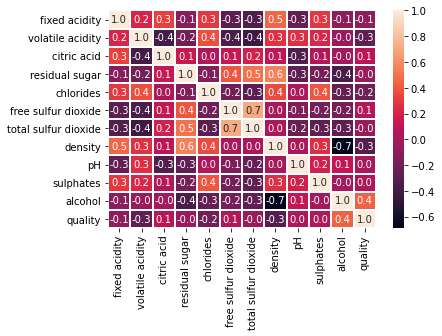

In [7]:
sns.heatmap(wines.corr(),fmt='.1f',linewidths=1,annot=True);

In [8]:
wines.drop(columns=['fixed acidity','total sulfur dioxide','residual sugar','pH'],inplace=True)

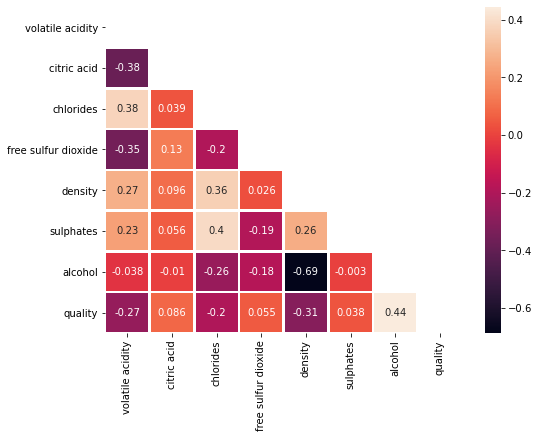

In [9]:
fig, ax = plt.subplots(figsize=(8,6), ) 
mask = np.triu(np.ones_like(wines.corr(), dtype=bool)) 
plot = sns.heatmap(wines.corr(), annot= True, mask=mask, linewidths=1.5)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [11]:
X= wines.drop(['quality_label','quality'], axis=1)
y= wines['quality_label']
X= pd.get_dummies(X)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(X))
X = scaler.transform(X)

MinMaxScaler()


In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.80,random_state=1)

In [14]:
logmodel = LogisticRegression(class_weight='balanced',random_state=0)

In [15]:
logmodel.fit(X_train,y_train)
logmodel.get_params()

C:\Anaconda2\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [16]:
predictions = logmodel.predict(X_test)

In [17]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n        high       0.01      1.00      0.01         1\n         low       0.93      0.70      0.80      1064\n      medium       0.32      0.44      0.37       235\n\n    accuracy                           0.65      1300\n   macro avg       0.42      0.71      0.39      1300\nweighted avg       0.82      0.65      0.72      1300\n'

In [18]:
confusion_matrix(y_test,predictions)

array([[  1,   0,   0],
       [109, 741, 214],
       [ 76,  56, 103]], dtype=int64)

In [19]:
accuracy_score(y_test,predictions) * 100

65.0